In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df_gs = pd.read_csv("outputs/memory_manual_2/gs_manual_2.txt", sep=", ")
df_dense = pd.read_csv("outputs/memory_manual_2/dense_manual_2_new.txt", sep=", ")
df_sparse = pd.read_csv("outputs/memory_manual_2/sparse_manual_2_new.txt", sep=", ")
df_newton = pd.read_csv("outputs/memory_manual_2/newton_manual_2.txt", sep=", ")

<ipython-input-19-858eca9aa988>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_gs = pd.read_csv("outputs/memory_manual_2/gs_manual_2.txt", sep=", ")
<ipython-input-19-858eca9aa988>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_dense = pd.read_csv("outputs/memory_manual_2/dense_manual_2_new.txt", sep=", ")
<ipython-input-19-858eca9aa988>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_sparse = pd.r

In [20]:
df_gs.columns

Index(['N', 'start', 'end'], dtype='object')

In [21]:
df_gs["memory"] = df_gs["end"] - df_gs["start"]
df_dense["memory"] = df_dense["end"] - df_dense["start"]
df_sparse["memory"] = df_sparse["end"] - df_sparse["start"]
df_newton["memory"] = df_newton["end"] - df_newton["start"]

In [22]:
df_sparse

,N,start,end,memory
0,7,110.964844,111.921875,0.957031
1,14,110.832031,111.812500,0.980469
2,28,111.464844,112.679688,1.214844
3,56,113.152344,116.984375,3.832031
4,84,115.937500,122.542969,6.605469
5,112,119.875000,133.765625,13.890625
6,224,147.734375,212.500000,64.765625
7,336,193.566406,357.113281,163.546875
8,448,259.429688,563.566406,304.136719


In [23]:
df_sparse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       9 non-null      int64  
 1   start   9 non-null      float64
 2   end     9 non-null      float64
 3   memory  9 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 416.0 bytes


# Plots

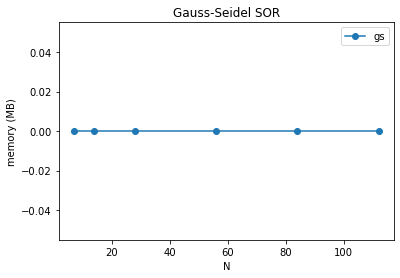

In [25]:
plt.plot(df_gs["N"], df_gs["memory"], label="gs", marker="o")

plt.title("Gauss-Seidel SOR")
plt.xlabel("N")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

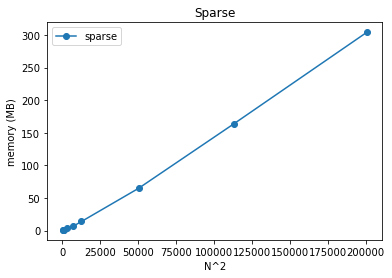

In [26]:
plt.plot(df_sparse["N"]**2, df_sparse["memory"], label="sparse", marker="o")

plt.title("Sparse")
plt.xlabel("N^2")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

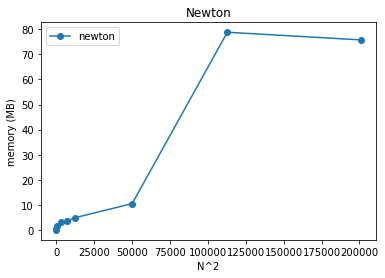

In [35]:
plt.plot(df_newton["N"]**2, df_newton["memory"], label="newton", marker="o")

plt.title("Newton")
plt.xlabel("N^2")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

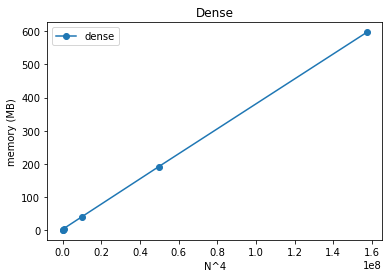

In [36]:
plt.plot(df_dense["N"]**4, df_dense["memory"], label="dense", marker="o")

plt.title("Dense")
plt.xlabel("N^4")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

# Manual check

## Direct

In [7]:
df_direct = pd.read_csv("outputs/memory_manual/direct_manual.txt", sep=", ", engine="python")
df_direct

,N,start,end
0,7,110.996094,111.785156
1,14,110.886719,112.523438
2,28,110.417969,124.957031
3,56,110.738281,276.089844
4,84,110.703125,889.300781
5,112,111.164062,2518.101562


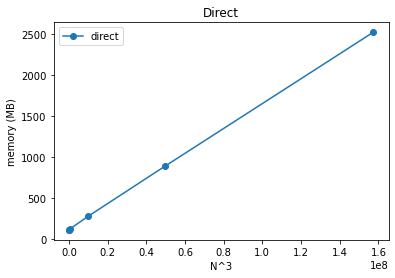

In [8]:
plt.plot(df_direct["N"]**4, df_direct["end"], label="direct", marker="o")

plt.title("Direct")
plt.xlabel("N^3")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

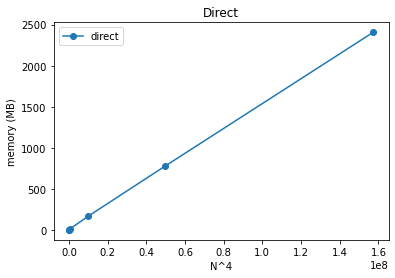

In [9]:
plt.plot(df_direct["N"]**4, df_direct["end"] - df_direct["start"], label="direct", marker="o")

plt.title("Direct")
plt.xlabel("N^4")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

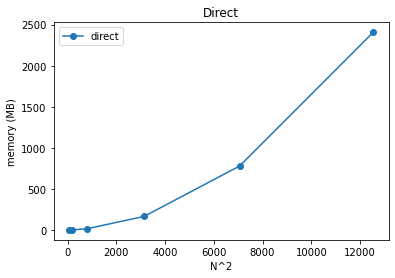

In [10]:
plt.plot(df_direct["N"]**2, df_direct["end"] - df_direct["start"], label="direct", marker="o")

plt.title("Direct")
plt.xlabel("N^2")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

In [11]:
coeffs, error = np.polyfit(x=df_direct["N"] ** 4, y=df_direct["end"] - df_direct["start"], deg=1, cov=True)
coeffs, error

(array([1.52752947e-05, 7.25063709e+00]),
 array([[ 3.59773136e-15, -1.30495138e-07],
        [-1.30495138e-07,  1.63909567e+01]]))

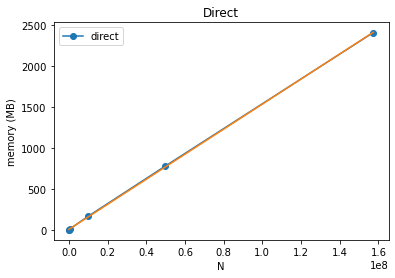

In [12]:
plt.plot(df_direct["N"]**4, df_direct["end"] - df_direct["start"], label="direct", marker="o")
x = np.linspace(7, np.max(df_direct["N"]) ** 4+1, 100)
plt.plot(x, np.polyval(coeffs, x))

plt.title("Direct")
plt.xlabel("N")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

In [13]:
coeffs, error = np.polyfit(x=df_direct["N"] ** 2, y=df_direct["end"] - df_direct["start"], deg=2, cov=True)
coeffs, error

(array([1.48392826e-05, 5.67218077e-03, 5.98891945e-01]),
 array([[ 5.77495528e-16, -6.98821423e-12,  6.73251885e-09],
        [-6.98821423e-12,  9.09112619e-08, -1.06611296e-04],
        [ 6.73251885e-09, -1.06611296e-04,  3.08725514e-01]]))

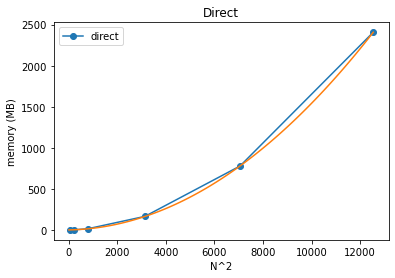

In [14]:
plt.plot(df_direct["N"]**2, df_direct["end"] - df_direct["start"], label="direct", marker="o")
x = np.linspace(7, np.max(df_direct["N"]) ** 2 + 1, 100)
plt.plot(x, np.polyval(coeffs, x))

plt.title("Direct")
plt.xlabel("N^2")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

Quadratic in N^2 => linear in N^4

## GS

In [15]:
df_gs = pd.read_csv("outputs/memory_manual/gs_manual.txt", sep=", ", engine="python")
df_gs

,N,start,end
0,7,110.320312,110.488281
1,14,110.613281,110.863281
2,28,110.683594,110.871094
3,56,111.015625,111.187500
4,112,110.539062,110.699219


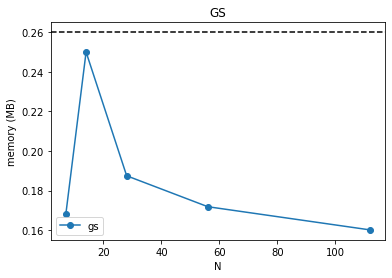

In [24]:
plt.plot(df_gs["N"], df_gs["end"] - df_gs["start"], label="gs", marker="o")
plt.axhline(y=0.26, linestyle="--", color="black")

plt.title("GS")
plt.xlabel("N")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

## Sparse

In [17]:
df_sparse = pd.read_csv("outputs/memory_manual/sparse_manual.txt", sep=", ", engine="python")
df_sparse

,N,start,end
0,7,110.781250,111.937500
1,14,110.472656,111.695312
2,28,110.757812,112.535156
3,56,110.734375,116.261719
4,112,111.449219,134.480469
5,224,111.968750,212.832031
6,448,114.546875,561.500000


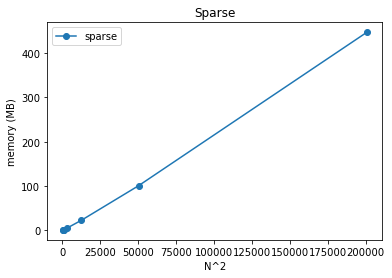

In [18]:
plt.plot(df_sparse["N"]**2, df_sparse["end"] - df_sparse["start"], label="sparse", marker="o")

plt.title("Sparse")
plt.xlabel("N^2")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

In [19]:
coeffs, error = np.polyfit(x=df_sparse["N"] ** 2, y=df_sparse["end"] - df_sparse["start"], deg=1, cov=True)
coeffs, error

(array([ 0.00222619, -2.16771531]),
 array([[ 6.86528660e-10, -2.62439311e-05],
        [-2.62439311e-05,  4.21406675e+00]]))

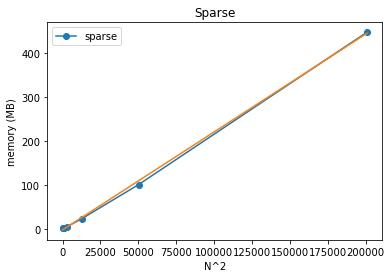

In [20]:
plt.plot(df_sparse["N"]**2, df_sparse["end"] - df_sparse["start"], label="sparse", marker="o")
x = np.linspace(7, np.max(df_sparse["N"]) ** 2 + 1, 100)
plt.plot(x, np.polyval(coeffs, x))

plt.title("Sparse")
plt.xlabel("N^2")
plt.ylabel("memory (MB)")
plt.legend()
# plt.xscale("log")
plt.show()

In [30]:
# df = df_sparse.copy()
# df["memory_usage"] = df["end"] - df["start"]
# df["N_2"] = df["N"] ** 2
# # df[["N_2", "memory_usage"]].to_csv("data/sparse_memory_usage.csv", index=False)
# df[["N_2", "memory_usage", "N"]]

,N_2,memory_usage,N
0,49,1.156250,7
1,196,1.222656,14
2,784,1.777344,28
3,3136,5.527344,56
4,12544,23.031250,112
5,50176,100.863281,224
6,200704,446.953125,448
